# Data Collection

Collecting the data from the airline website [Skytrax](https://www.airlinequality.com/airport-reviews/auckland-airport/). I collected the data about airline rating, seat ratings and 
lounge experience rating.

In [1]:
#Imports
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests

In [2]:
#Create emplty list to collect all reviews, rating stars, collect data, review from  the countries
reviews = []
stars = []
date = []
country = []

In [3]:
for i in range(1, 100):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html5")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 30
Error on page 31
Error on page 31
Error on page 33
Error on page 34


In [4]:
len(reviews)

3485

In [5]:
len(country)

3485

In [6]:
len(date)

3485

In [7]:
len(country)

3485

In [8]:
len(stars)

3584

In [9]:
# All arrays must be of the same length
stars=stars[:3485]

In [10]:
BA = pd.DataFrame({"reviews":reviews,"stars":stars,"date":date,"country":country})

In [11]:
BA.head(3)

reviews  \
0  ✅ Trip Verified |  At 7.54 am on the day of tr...   
1  ✅ Trip Verified |  Would happily fly them agai...   
2  Not Verified |  Flew premium, only worth the e...   

                           stars            date         country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  4th March 2023  United Kingdom  
1                              2  2nd March 2023   United States  
2                             10  2nd March 2023  United Kingdom

In [12]:
# #Exporting Data
import os
cwd = os.getcwd()  #The CWD is the directory from which the Python script is being executed.
BA.to_csv(cwd + "/BA_reviews.csv")

# Data Cleaning

In [13]:
import re

1.import re is a Python statement that imports the re module. The re module is a built-in module in Python that provides support for regular expressions. Regular expressions are a powerful way of pattern matching and manipulating text.

2.Once the re module is imported, you can use its functions and classes to perform various operations on strings, such as searching for patterns, replacing text, splitting strings, and more.

In [14]:
BA = pd.read_csv(cwd + "/BA_reviews.csv", index_col=0)

In [15]:
BA.head(3)

reviews  \
0  ✅ Trip Verified |  At 7.54 am on the day of tr...   
1  ✅ Trip Verified |  Would happily fly them agai...   
2  Not Verified |  Flew premium, only worth the e...   

                           stars            date         country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  4th March 2023  United Kingdom  
1                              2  2nd March 2023   United States  
2                             10  2nd March 2023  United Kingdom

In [16]:
BA['verified'] = BA.reviews.str.contains("Trip Verified")

In [17]:
BA.head(3)

reviews  \
0  ✅ Trip Verified |  At 7.54 am on the day of tr...   
1  ✅ Trip Verified |  Would happily fly them agai...   
2  Not Verified |  Flew premium, only worth the e...   

                           stars            date         country  verified  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  4th March 2023  United Kingdom      True  
1                              2  2nd March 2023   United States      True  
2                             10  2nd March 2023  United Kingdom     False

#.strip() is a string method in Python that removes a set of characters from the beginning and end of a string

In [18]:
#create an empty list to collect cleaned data corpus
#for lemmatization of words we will use nltk library

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()
reviews_data = BA.reviews.str.strip("✅ Trip Verified |") 

corpus =[]

#loop through each review, remove punctuations, small case it, join it and add it to corpus
for rev in reviews_data:
    rev = re.sub('[^a-zA-Z]',' ', rev)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemma.lemmatize(word) for word in rev if word not in set(stopwords.words("english"))]
    rev = " ".join(rev)
    corpus.append(rev)

In [19]:
# add the corpus to the original dataframe
BA['corpus'] = corpus

In [20]:
BA.head(3)

reviews  \
0  ✅ Trip Verified |  At 7.54 am on the day of tr...   
1  ✅ Trip Verified |  Would happily fly them agai...   
2  Not Verified |  Flew premium, only worth the e...   

                           stars            date         country  verified  \
0  \n\t\t\t\t\t\t\t\t\t\t\t\t\t5  4th March 2023  United Kingdom      True   
1                              2  2nd March 2023   United States      True   
2                             10  2nd March 2023  United Kingdom     False   

                                              corpus  
0  day travel whilst driving london heathrow rece...  
1  would happily fly personal emergency allowed r...  
2  verified flew premium worth extra money bit ex...

In [21]:
BA.dtypes

reviews     object
stars       object
date        object
country     object
verified      bool
corpus      object
dtype: object

In [22]:
# convert the date to datetime format
BA.date = pd.to_datetime(BA.date)
BA.date.head()

0   2023-03-04
1   2023-03-02
2   2023-03-02
3   2023-02-28
4   2023-02-27
Name: date, dtype: datetime64[ns]

In [23]:
#check for unique values
BA.stars.unique()

array(['\n\t\t\t\t\t\t\t\t\t\t\t\t\t5', '2', '10', '4', '1', '8', '6',
       '7', '5', '9', '3', 'None'], dtype=object)

In [24]:
# remove the \t and \n from the ratings
BA.stars = BA.stars.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")
BA.drop(BA[BA.stars == 'None'].index, axis=0, inplace= True)

In [25]:
BA.stars.unique()

array(['5', '2', '10', '4', '1', '8', '6', '7', '9', '3'], dtype=object)

In [26]:
BA.stars.value_counts()

1     756
2     390
3     385
8     348
10    315
7     305
9     301
5     262
4     234
6     184
Name: stars, dtype: int64

In [27]:
BA.isnull().sum()

reviews     0
stars       0
date        0
country     2
verified    0
corpus      0
dtype: int64

In [28]:
BA.dropna(inplace = True)

In [29]:
BA.isnull().sum()

reviews     0
stars       0
date        0
country     0
verified    0
corpus      0
dtype: int64

In [30]:
BA.shape

(3478, 6)

In [31]:
BA.head(2)

reviews stars       date  \
0  ✅ Trip Verified |  At 7.54 am on the day of tr...     5 2023-03-04   
1  ✅ Trip Verified |  Would happily fly them agai...     2 2023-03-02   

          country  verified                                             corpus  
0  United Kingdom      True  day travel whilst driving london heathrow rece...  
1   United States      True  would happily fly personal emergency allowed r...

In [32]:
BA.reset_index(drop=True)

reviews stars       date  \
0     ✅ Trip Verified |  At 7.54 am on the day of tr...     5 2023-03-04   
1     ✅ Trip Verified |  Would happily fly them agai...     2 2023-03-02   
2     Not Verified |  Flew premium, only worth the e...    10 2023-03-02   
3     ✅ Trip Verified |  First our morning flight wa...     4 2023-02-28   
4     ✅ Trip Verified |  Although it was a bit uncom...     1 2023-02-27   
...                                                 ...   ...        ...   
3473  Business LHR to BKK. 747-400. First try back w...     7 2012-08-29   
3474  LHR to HAM. Purser addresses all club passenge...     1 2012-08-28   
3475  My son who had worked for British Airways urge...     9 2011-10-12   
3476  London City-New York JFK via Shannon on A318 b...    10 2011-10-11   
3477  SIN-LHR BA12 B747-436 First Class. Old aircraf...    10 2011-10-09   

             country  verified  \
0     United Kingdom      True   
1      United States      True   
2     United Kingdom     False   
3             Canada      True   
4     United Kingdom      True   
...              ...       ...   
3473  United Kingdom     False   
3474  United Kingdom     False   
3475  United Kingdom     False   
3476   United States     False   
3477  United Kingdom     False   

                                                 corpus  
0     day travel whilst driving london heathrow rece...  
1     would happily fly personal emergency allowed r...  
2     verified flew premium worth extra money bit ex...  
3     first morning flight cancelled moved afternoon...  
4     although bit uncomfortable flight economy flig...  
...                                                 ...  
3473  business lhr bkk first try back ba year flown ...  
3474  lhr ham purser address club passenger name boa...  
3475  son worked british airway urged fly british ai...  
3476  london city new york jfk via shannon really ni...  
3477  sin lhr ba b first class old aircraft seat pri...  

[3478 rows x 6 columns]

In [33]:
# Export cleaned data
BA.to_csv(cwd + "/cleaned_BA_reviews.csv" )

# Exploratory Data Analysis

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [35]:
# create the dataframe
cwd = os.getcwd()
BAC = pd.read_csv(cwd + "/cleaned_BA_reviews.csv", index_col=0)
BAC = BAC.reset_index(drop=True)

In [36]:
BAC.head(3)

reviews  stars        date  \
0  ✅ Trip Verified |  At 7.54 am on the day of tr...      5  2023-03-04   
1  ✅ Trip Verified |  Would happily fly them agai...      2  2023-03-02   
2  Not Verified |  Flew premium, only worth the e...     10  2023-03-02   

          country  verified                                             corpus  
0  United Kingdom      True  day travel whilst driving london heathrow rece...  
1   United States      True  would happily fly personal emergency allowed r...  
2  United Kingdom     False  verified flew premium worth extra money bit ex...

# What is the Min, Max and Average Rating given for British Airways?

In [37]:
BAC.describe() 

stars
count  3478.000000
mean      4.831800
std       3.149181
min       1.000000
25%       2.000000
50%       4.000000
75%       8.000000
max      10.000000

In [38]:
ratings = pd.DataFrame(BAC.stars.value_counts())
ratings

stars
1     756
2     390
3     385
8     348
10    314
7     305
9     301
5     262
4     233
6     184

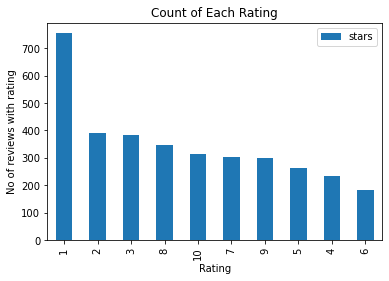

In [39]:
ratings.plot(kind = 'bar')
plt.xlabel('Rating')
plt.ylabel('No of reviews with rating')
plt.title('Count of Each Rating')
#plt.savefig('no_of_reviews_countries.png', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
ratings.stars.values

array([756, 390, 385, 348, 314, 305, 301, 262, 233, 184], dtype=int64)

In [41]:
ratings.stars.sum()

3478

In [42]:
pct_values = (ratings.stars.values/ ratings.stars.sum() *100).tolist()
pct_values

[21.736630247268547,
 11.213341000575044,
 11.06958021851639,
 10.005750431282348,
 9.028177113283496,
 8.769407705577919,
 8.654399079930995,
 7.533064979873491,
 6.699252443933296,
 5.290396779758482]

In [43]:
ratings['pct_values'] = pct_values

In [44]:
#resetting index as we do not want to confuse between the index and the rating values
ratings = ratings.reset_index()

In [45]:
ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)
ratings

Stars  total_counts  pct_values
0      1           756   21.736630
1      2           390   11.213341
2      3           385   11.069580
3      8           348   10.005750
4     10           314    9.028177
5      7           305    8.769408
6      9           301    8.654399
7      5           262    7.533065
8      4           233    6.699252
9      6           184    5.290397

In [46]:
# len(BA.country.unique())

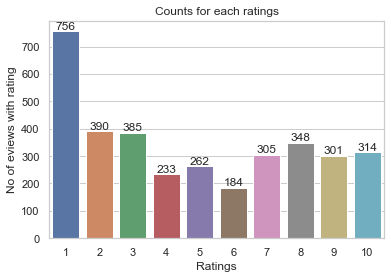

In [71]:
#clrs = [(x ==  max(ratings.total_counts))]
ax = sns.barplot(x=ratings.Stars, y=ratings.total_counts, data=ratings, errwidth=0,
                )


ax.bar_label(ax.containers[0])
    
ax.set_xlabel("Ratings")
ax.set_ylabel("No of eviews with rating")
ax.set_title("Counts for each ratings")
plt.savefig('count of each rating.png', dpi=300, bbox_inches='tight')
plt.show()

In [48]:
country_reviews = pd.DataFrame(BAC.country.value_counts()).reset_index()
country_reviews.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

In [49]:
country_reviews

country  total_reviews
0          United Kingdom           2217
1           United States            363
2               Australia            149
3                  Canada            107
4                 Germany             59
..                    ...            ...
64         Cayman Islands              1
65                 Jordan              1
66                Vietnam              1
67  Saint Kitts and Nevis              1
68                   Oman              1

[69 rows x 2 columns]

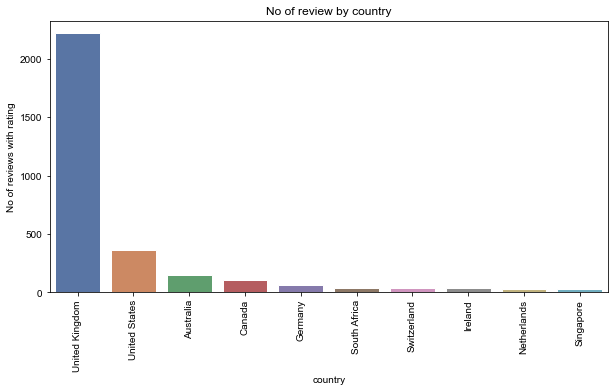

In [50]:
fig, ax0 = plt.subplots(figsize=(10,5))
sns.set(style='whitegrid')
ax0 = sns.barplot(x='country', y='total_reviews', data=country_reviews.head(10))
plt.ylabel('No of reviews with rating')
plt.title('No of review by country')
ax0.set_xticklabels(ax0.get_xticklabels(), rotation=90)
plt.savefig('no_of_reviews_countries.png', dpi=300, bbox_inches='tight')
plt.show()

# Which Country Provides Highest Rating?

In [51]:
# country_rating = pd.DataFrame(BAC.groupby('country').mean()['stars'].sort_values(ascending=False)).reset_index()
country_rating = pd.DataFrame(BAC.groupby('country')['stars'].mean(numeric_only=True).sort_values(ascending=False)).reset_index()

In [52]:
country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)
country_rating.head()

country  avg_rating
0                   Laos        10.0
1  Saint Kitts and Nevis        10.0
2     Dominican Republic         9.0
3               Barbados         9.0
4               Botswana         8.5

In [53]:
a=country_rating.tail(15)
a

country  avg_rating
54            Portugal    3.384615
55            Slovakia    3.333333
56             Iceland    3.000000
57               Ghana    3.000000
58             Vietnam    3.000000
59         South Korea    2.800000
60             Hungary    2.500000
61               Egypt    2.000000
62  Russian Federation    1.500000
63              Jordan    1.000000
64          Luxembourg    1.000000
65           Indonesia    1.000000
66              Panama    1.000000
67             Bermuda    1.000000
68             Bahrain    1.000000

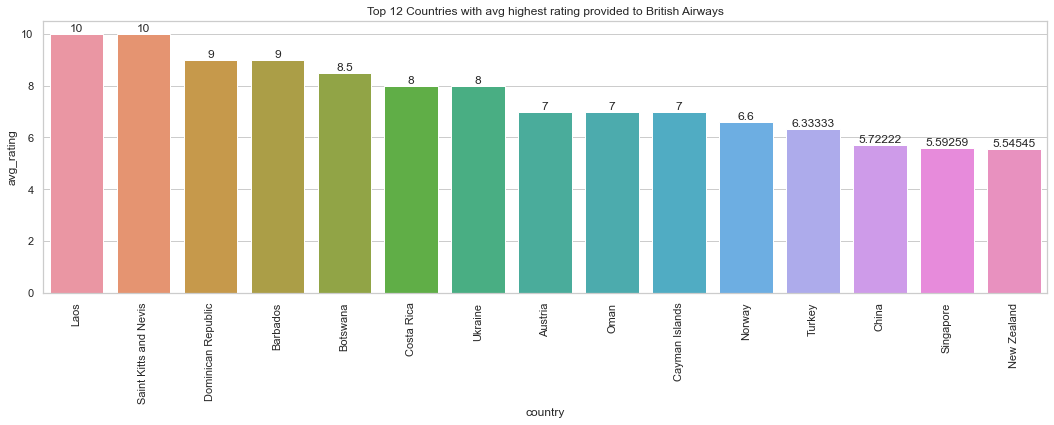

In [54]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=country_rating.head(15))
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.savefig('Countries_Highest_rating.png', dpi=300, bbox_inches='tight')
plt.show()

In [55]:
fig, ax2 = plt.subplots(figsize=(18,5))
country_rating = country_rating.sort_values(by='avg_rating', ascending=True)
ax2 = sns.barplot(x='country', y='avg_rating', data=a)
ax2.bar_label(ax.containers[0])
ax2.set_title("Countries with avg Lowest rating provided to British Airways")
plt.savefig('Countries_Lowest_rating.png', dpi=300, bbox_inches='tight')
plt.show()

# Time Series Analysis

In [56]:
import pandas as pd
import plotly.express as px

# Convert the date column to datetime type
BAC['date'] = pd.to_datetime(BAC['date'])

# Filter the data to include only the latest 5 years
BAC = BAC[BAC['date'] >= BAC['date'].max() - pd.DateOffset(years=5)]

# Group the data by date and calculate the mean star rating for each day
BAC_daily = BAC.groupby('date')['stars'].mean().reset_index()

# Create the plot using a line chart with markers
fig = px.line(BAC_daily, x='date', y='stars', title='Bank of America Reviews Over Time')
fig.update_traces(mode='markers+lines', marker=dict(size=3, color='navy'))
fig.update_xaxes(title='Date', rangeslider_visible=True, rangeselector=dict(buttons=list([
    dict(count=1, label="1 Year", step="year", stepmode="backward"),
    dict(count=2, label="2 Years", step="year", stepmode="backward"),
    dict(count=3, label="3 Years", step="year", stepmode="backward"),
    dict(count=4, label="4 Years", step="year", stepmode="backward"),
    dict(step="all")
])))
fig.update_yaxes(title='Mean Star Rating')
fig.show()

In [57]:
import pandas as pd
import plotly.express as px

# Convert the date column to datetime type
BAC['date'] = pd.to_datetime(BAC['date'])

# Filter the data to include only the latest 5 years
BAC = BAC[BAC['date'] >= BAC['date'].max() - pd.DateOffset(years=5)]

# Create the plot
fig = px.bar(BAC, x='date', y='stars', title='British Airways Reviews Over Time')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [58]:
import pandas as pd
import plotly.express as px

# Convert the date column to datetime type
BAC['date'] = pd.to_datetime(BAC['date'])

# Filter the data to include only the latest 5 years
BAC = BAC[BAC['date'] >= BAC['date'].max() - pd.DateOffset(years=5)]

# Create the bar chart
fig = px.bar(BAC, x='date', y='stars', title='British Airways Reviews Over Time',
             labels={'date': 'Date', 'stars': 'Number of Stars'})

fig.update_layout(
    xaxis=dict(
        tickformat='%Y-%m-%d',
        tickangle=-45,
        title_font=dict(size=14),
        tickfont=dict(size=12),
        tickmode='auto',
        nticks=10
    ),
    yaxis=dict(
        title='Number of Reviews',
        title_font=dict(size=14),
        tickfont=dict(size=12)
    ),
    title=dict(
        font=dict(size=20),
        x=0.5,
        y=0.95
    ),
    legend=dict(
        title='',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    )
)

fig.show()

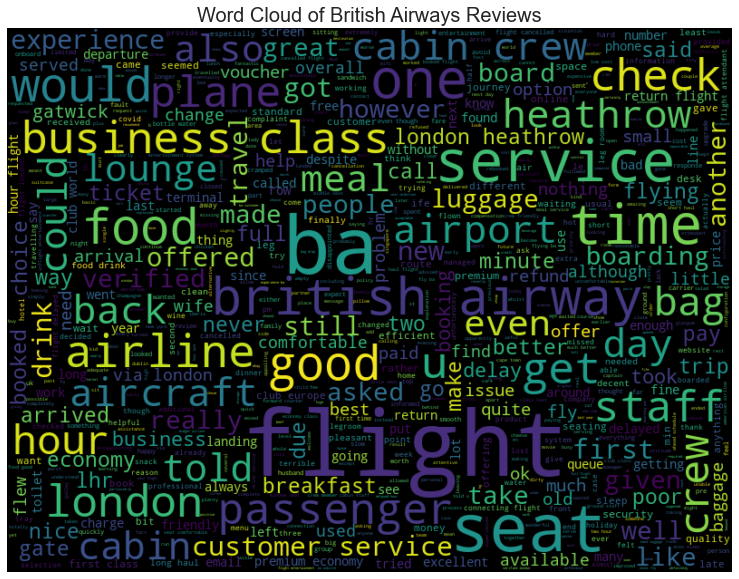

In [59]:
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords

# Combine all the reviews into one string
reviews = " ".join(BAC.corpus)

# Define stopwords to exclude from the wordcloud
stopwords = set(stopwords.words('english'))

# Create the wordcloud
wordcloud = WordCloud(height=600, width=800, max_words=700, max_font_size=100, stopwords=stopwords, background_color='black'
).generate(reviews)

# Display the wordcloud
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of British Airways Reviews", fontsize=20)
plt.show()

There are many words that does not set the idea of whether the review is positive or negative. For example words like "passenger", "flight", etc. does not add conlcusive value hence we can include them in stopwords list.

<Figure size 1440x720 with 0 Axes>

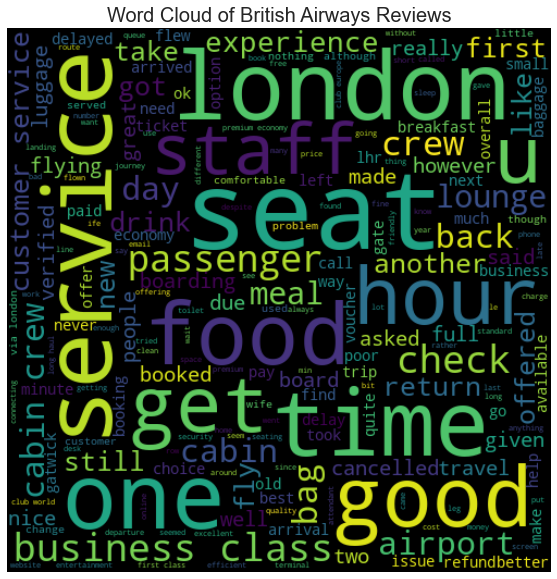

In [60]:
import nltk
from nltk.corpus import stopwords
reviews = " ".join(BAC.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would","t","s","did",'just'])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=200, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of British Airways Reviews", fontsize=20)

# Save the graph
plt.savefig('word_cloud_BAR.png', dpi=300, bbox_inches='tight')

plt.show()

# Word Frequency

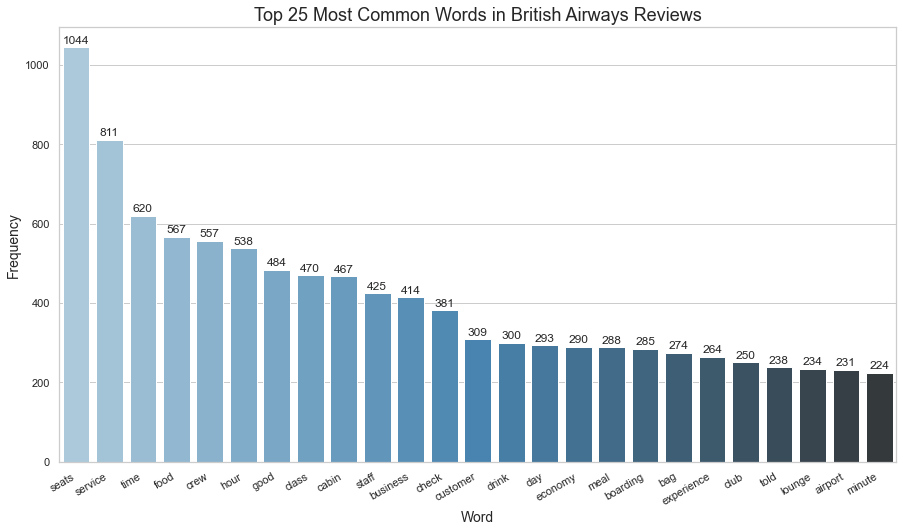

In [61]:
import nltk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine all the reviews into one string
reviews = " ".join(BAC.corpus)

# Split the text of all reviews into a list of words
re_words = reviews.split(" ")

# Remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger", "u", "london", "airway", "british",\
                                           "airline", "heathrow", "plane", "lhr", "review", "t", "s", "did", 'just'])

new_words = [word if word != "seat" else "seats" for word in re_words if word not in stopwords]

# Create a dataframe of these word and its frequencies
fdist = FreqDist(new_words).most_common(25)
df = pd.DataFrame(fdist, columns=['Word', 'Frequency'])

# Set figure and axes
fig, ax = plt.subplots(figsize=(15,8))

# Plot the bar chart using seaborn
sns.barplot(data=df, x='Word', y='Frequency', ax=ax, palette='Blues_d')
ax.set_xlabel('Word', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)
ax.set_title('Top 25 Most Common Words in British Airways Reviews', fontsize=18)

# Add labels to the bars
for i, v in enumerate(df['Frequency']):
    ax.text(i, v+10, str(v), ha='center', fontsize=12)

# Rotate x-axis labels for ease of viewing
plt.xticks(rotation=30, ha='right')

# Save the graph
plt.savefig('Top25_words.png', dpi=300, bbox_inches='tight')

plt.show()

Seat is the most talked about aspect of the airline, followed by "Service" and "Food," all of which are very essential to customers in terms of service. However, we still do not know how they feel about each of these services. To give these terms meaning, we'll use ngram plots to see if they're bad or excellent in practice.

# Word Frequency with N-gram

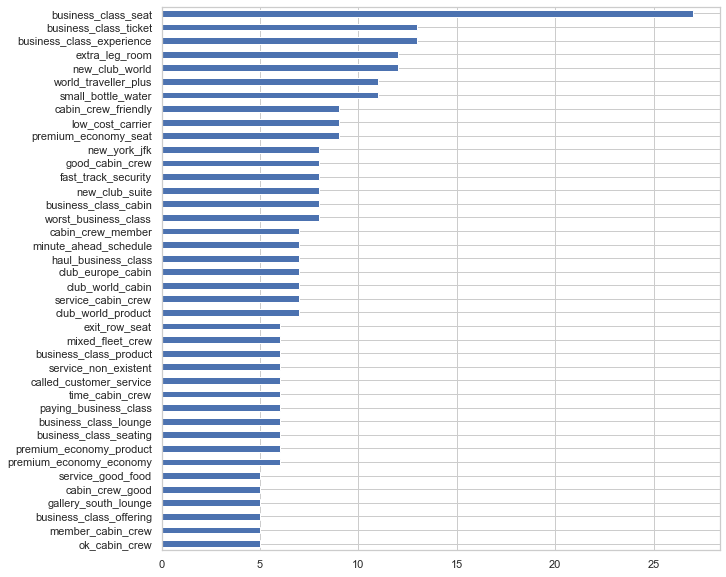

In [62]:
## Imports
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(BAC.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,3)
plt.show()

We can see that there are very common positive terms regarding cabin crew. For example, cabin_crew_friendly, good_cabin_crew, etc. So certainly customers are providing good reviews about cabin crew staff of British Airways.

However, there is another approach we can attempt to discover the word frequencies that will provide us with a better idea. We will organize the evaluations by rating. Assume ratios 1-3 are negative evaluations, 4-6 are average/good experiences, and 7-10 are excellent experiences.

In [63]:
ratings_1_3 = BAC[BAC.stars.isin([1,2,3])]
ratings_4_7 = BAC[BAC.stars.isin([4,5,6,7])]
ratings_8_10 = BAC[BAC.stars.isin([8,9,10])]

<AxesSubplot:>

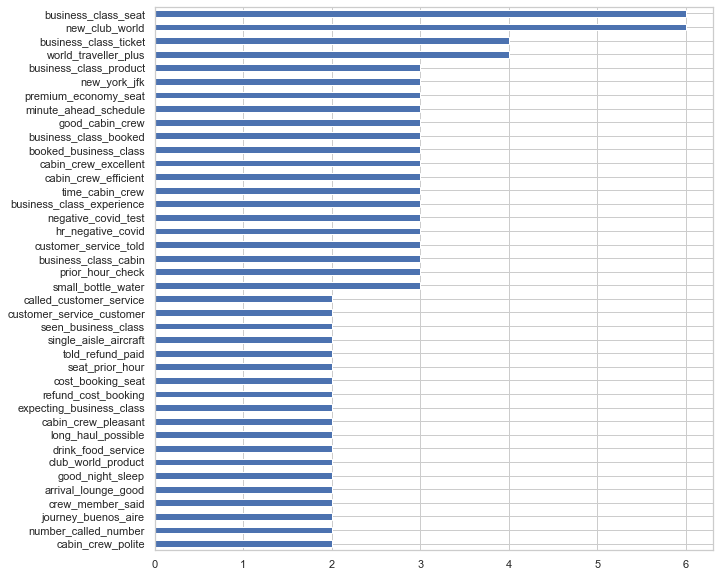

In [64]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_7 = " ".join(ratings_4_7.corpus)
reviews_8_10 = " ".join(ratings_8_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_7 = reviews_4_7.split(" ")
words_8_10 = reviews_8_10.split(" ")


new_words_8_10 = [word for word in words_8_10 if word not in stopwords]

get_freq_dist(new_words_8_10,3)

<AxesSubplot:>

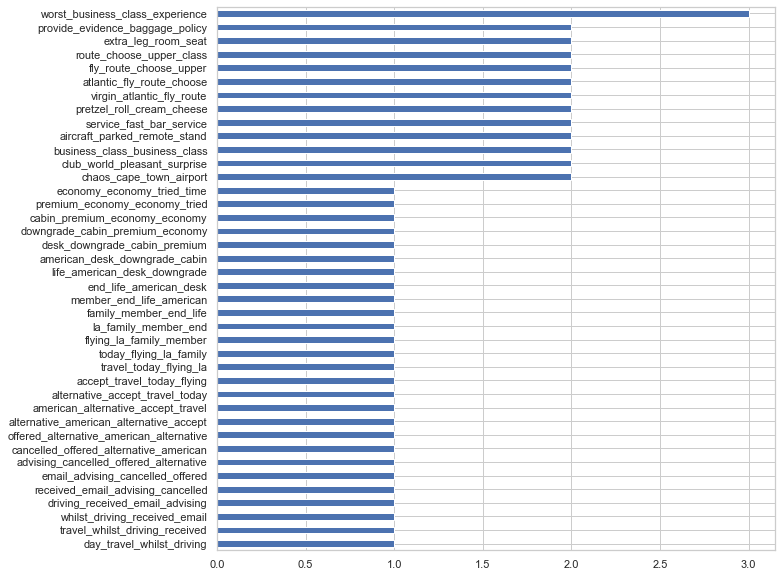

In [65]:
new_words_4_7 = [word for word in words_4_7 if word not in stopwords]

get_freq_dist(new_words_4_7,4)

<AxesSubplot:>

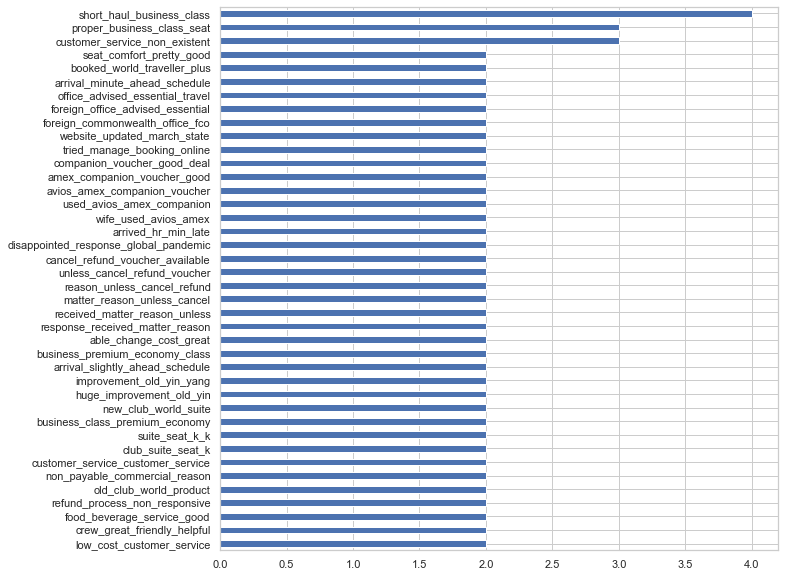

In [73]:
new_words_1_3 = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words_1_3,4)

We will now use the textblob library to determine whether the text is negative or positive and to what degree.

In [67]:
from textblob import TextBlob

# Analyze sentiment of reviews using TextBlob
sentiment = BAC['corpus'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Add sentiment to dataframe
BAC['polarity'] = sentiment

# Print number of reviews with a polarity score between -0.2 and 0.2, and between -0.1 and 0.1
# let's see how many texts are with positive comments
print(f"{BAC[(BAC['polarity'] >-0.2) & (BAC['polarity'] <0.2)].shape[0]} number of reviews between -0.2 and 0.2 polarity score")
print(f"{BAC[(BAC['polarity'] >-0.1) & (BAC['polarity'] <0.1)].shape[0]} number of reviews between -0.1 and 0.1 polarity score")

672 number of reviews between -0.2 and 0.2 polarity score
396 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.

We will try another method of labelling the reveiws as positives or negatives. In this we will use VADER algorihtm by nltk library.

In [68]:
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

BAC['label'] = BAC['corpus'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

BAC['label'] = BAC['label'].apply(lambda x: 1 if x > 0.2 else (-1 if x < 0 else 0))

BAC.label.value_counts()

 1    649
-1    376
 0     38
Name: label, dtype: int64

Topic Modeling with LDA
We have already cleaned our reviews, however, for topic modeling we will also require word embeddings or (words matrix). For this purpose we will use count vectorizer method from sklearn library.

In [74]:
%%capture
from sklearn.feature_extraction.text import CountVectorizer

#create an object of count vectorizer
vect = CountVectorizer()

#apply transformation
tf = vect.fit_transform(BAC.corpus).toarray()
tf_feature_names = vect.get_feature_names()

In [75]:
from sklearn.decomposition import LatentDirichletAllocation

#declare the number of topics
number_of_topics = 8

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

#fit the term frequency data to the model
model.fit(tf)

#create empty dictionary to store key value pair of topic number and its weights
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
BAC_topic =pd.DataFrame(topic_dict)

In [76]:
BAC_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights Topic 2 words  \
0            ba            63.4          seat           735.5        flight   
1        flight            34.0        flight           463.3          hour   
2       service            19.8            ba           354.8            ba   
3           two            15.0         class           352.6        london   
4         cabin            14.9      business           298.9       service   
5           son            14.9          food           297.7       british   
6          year            14.3       service           288.0        airway   
7        london            13.6          crew           268.0         staff   
8          take            12.7         cabin           251.8         check   
9       airline            12.2       economy           225.1      heathrow   

  Topic 2 weights Topic 3 words Topic 3 weights Topic 4 words Topic 4 weights  \
0           471.7     passenger            30.4        flight           317.5   
1           179.6         class            24.9            ba           268.9   
2           161.3      business            22.4      customer           188.9   
3           144.0          seat            22.3        airway           144.1   
4           126.4        flight            21.8       british           141.7   
5           122.5       economy            12.3       airline           137.4   
6           120.1          hour            10.9        refund           134.3   
7           106.9          crew            10.8       service           127.4   
8           105.0          told            10.7        booked           119.4   
9            94.6            st            10.5           day           118.4   

  Topic 5 words Topic 5 weights Topic 6 words Topic 6 weights Topic 7 words  \
0        flight           112.6        flight           312.9        flight   
1          good            77.6            ba           174.8            ba   
2          food            61.7        london            96.4          time   
3          crew            48.8           day            81.2          crew   
4        london            45.7         staff            76.9       service   
5       service            38.0           one            68.8          good   
6      boarding            35.9          hour            66.9         cabin   
7         cabin            35.6     cancelled            55.3          food   
8            ba            34.0          back            53.4         check   
9           bag            32.6      customer            52.2        lounge   

  Topic 7 weights  
0           461.3  
1           220.1  
2           200.7  
3           190.0  
4           162.5  
5           161.5  
6           148.6  
7           137.7  
8           117.3  
9           115.8

Certain words, such as "british airways," "take," "son," and so on, are ineffective in determining the general tone of the reviews.

# Topic modeling with NMF

In [98]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)
topic_dict = {}

#loop through model components 
for topic_idx, topic in enumerate(nmf.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(tf_feature_names[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
            for i in topic.argsort()[:-10 - 1:-1]]
    
df_topic =pd.DataFrame(topic_dict)
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0        flight            24.6          seat            11.9
1            ba             9.4            ba             6.3
2          hour             5.7         class             5.2
3        london             4.8          food             4.6
4          time             4.4      business             4.4
5       service             4.3       service             4.3
6           day             4.1         cabin             4.2
7        airway             3.9          crew             4.2
8         would             3.9          good             4.1
9       british             3.9       economy             3.6

In [105]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=2, init='random', random_state=0)
nmf.fit_transform(tf)
topic_dict = {}

# loop through model components
for topic_idx, topic in enumerate(nmf.components_):
    # get the top 10 words and their weights for the current topic
    top_words = ['{}'.format(tf_feature_names[i]) for i in topic.argsort()[:-10 - 1:-1]]
    top_weights = ['{:.1f}'.format(topic[i]) for i in topic.argsort()[:-10 - 1:-1]]
    
    # remove "seats", "ba", and "good" from the list of top words, if present
    words_to_remove = ["ba"]
    for word in words_to_remove:
        if word in top_words:
            index = top_words.index(word)
            top_words.pop(index)
            top_weights.pop(index)
    
    # truncate top_words and top_weights to the same length
    min_len = min(len(top_words), len(top_weights))
    top_words = top_words[:min_len]
    top_weights = top_weights[:min_len]
    
    # add the top words and weights to the topic dictionary
    topic_dict["Topic %d words" % (topic_idx)] = top_words
    topic_dict["Topic %d weights" % (topic_idx)] = top_weights
    
df_topic = pd.DataFrame(topic_dict)

In [95]:
df_topic

Topic 0 words Topic 0 weights Topic 1 words Topic 1 weights
0        flight            24.6          seat            11.9
1          hour             5.7         class             5.2
2        london             4.8          food             4.6
3          time             4.4      business             4.4
4       service             4.3       service             4.3
5           day             4.1         cabin             4.2
6        airway             3.9          crew             4.2
7         would             3.9          good             4.1
8       british             3.9       economy             3.6